In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.shape

(28242, 7)

In [19]:
print(df['avg_temp'].min())
print(df['avg_temp'].max())

1.3
30.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.duplicated().sum()

np.int64(2310)

In [8]:
df[df.duplicated()].head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2083,Bangladesh,Maize,1990,10015,2666.0,1266.0,25.98
2085,Bangladesh,Potatoes,1990,91410,2666.0,1266.0,25.98
2087,Bangladesh,"Rice, paddy",1990,25661,2666.0,1266.0,25.98
2089,Bangladesh,Sorghum,1990,8103,2666.0,1266.0,25.98
2091,Bangladesh,Sweet potatoes,1990,98316,2666.0,1266.0,25.98


In [9]:
# df[df.duplicated(subset=['Item', 'hg/ha_yield'])].head(10)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
df.corr(numeric_only=True)

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [14]:
len(df['Area'].unique())

101

### Frequency Vs Area

C:\Users\mnrth\AppData\Local\Temp\ipykernel_15300\3537338070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['Area'], palette='bright')


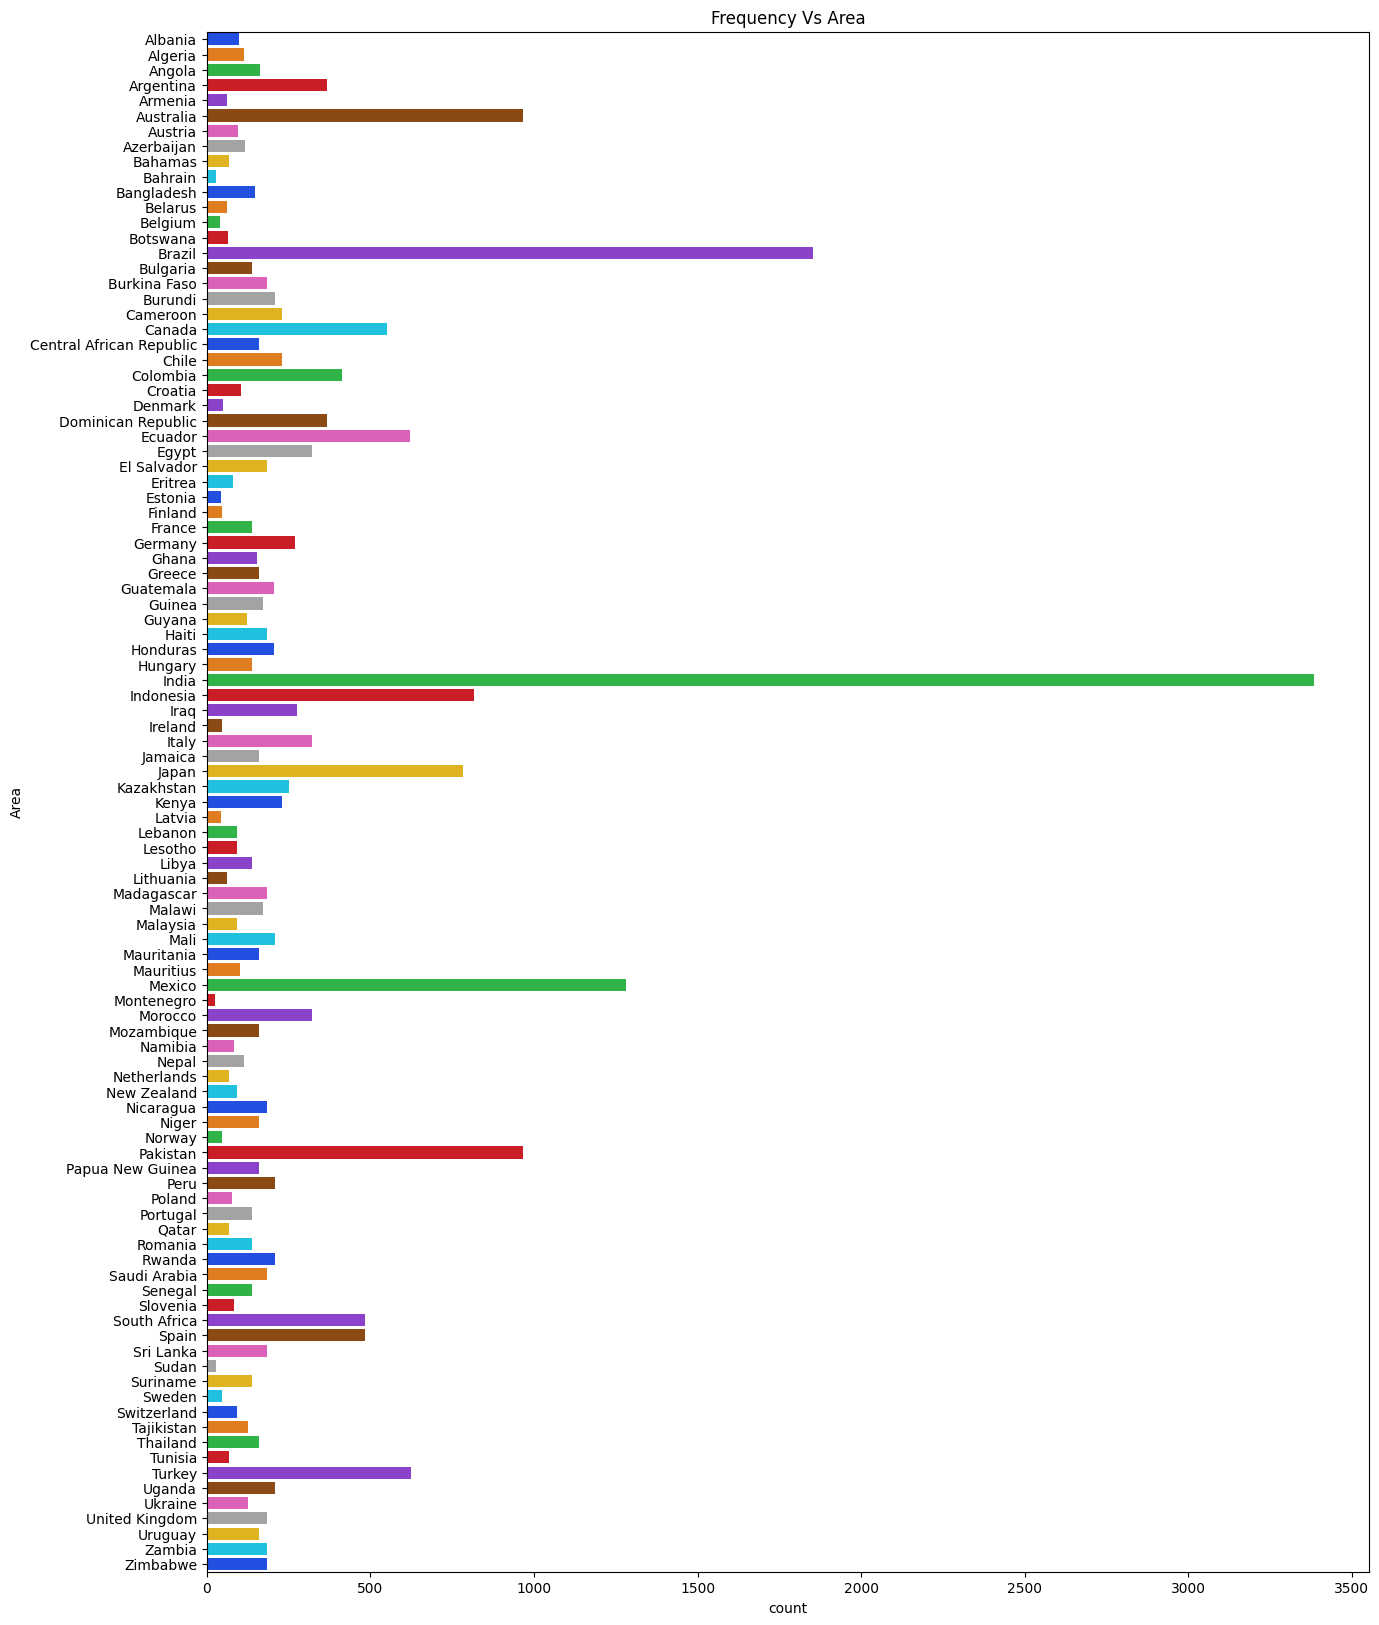

In [15]:
fig = plt.figure(figsize=(15, 20))
sns.countplot(y = df['Area'], palette='bright')
plt.title("Frequency Vs Area")

plt.show()

### Yeild per Area (Country)

In [16]:
Yeild_per_Area = df.groupby(by=['Area'])['hg/ha_yield'].sum()

In [17]:
df.groupby(by=['Area'])['hg/ha_yield'].sum().sort_values(ascending=False).iloc[:10]

Area
India             274219558
Brazil            136340329
Mexico            113698872
Australia         109111062
Japan             100924145
Indonesia          68067328
Turkey             52263950
Pakistan           49264956
Spain              46773540
United Kingdom     44335992
Name: hg/ha_yield, dtype: int64

C:\Users\mnrth\AppData\Local\Temp\ipykernel_15300\3559043466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = y, x = x, palette='bright')


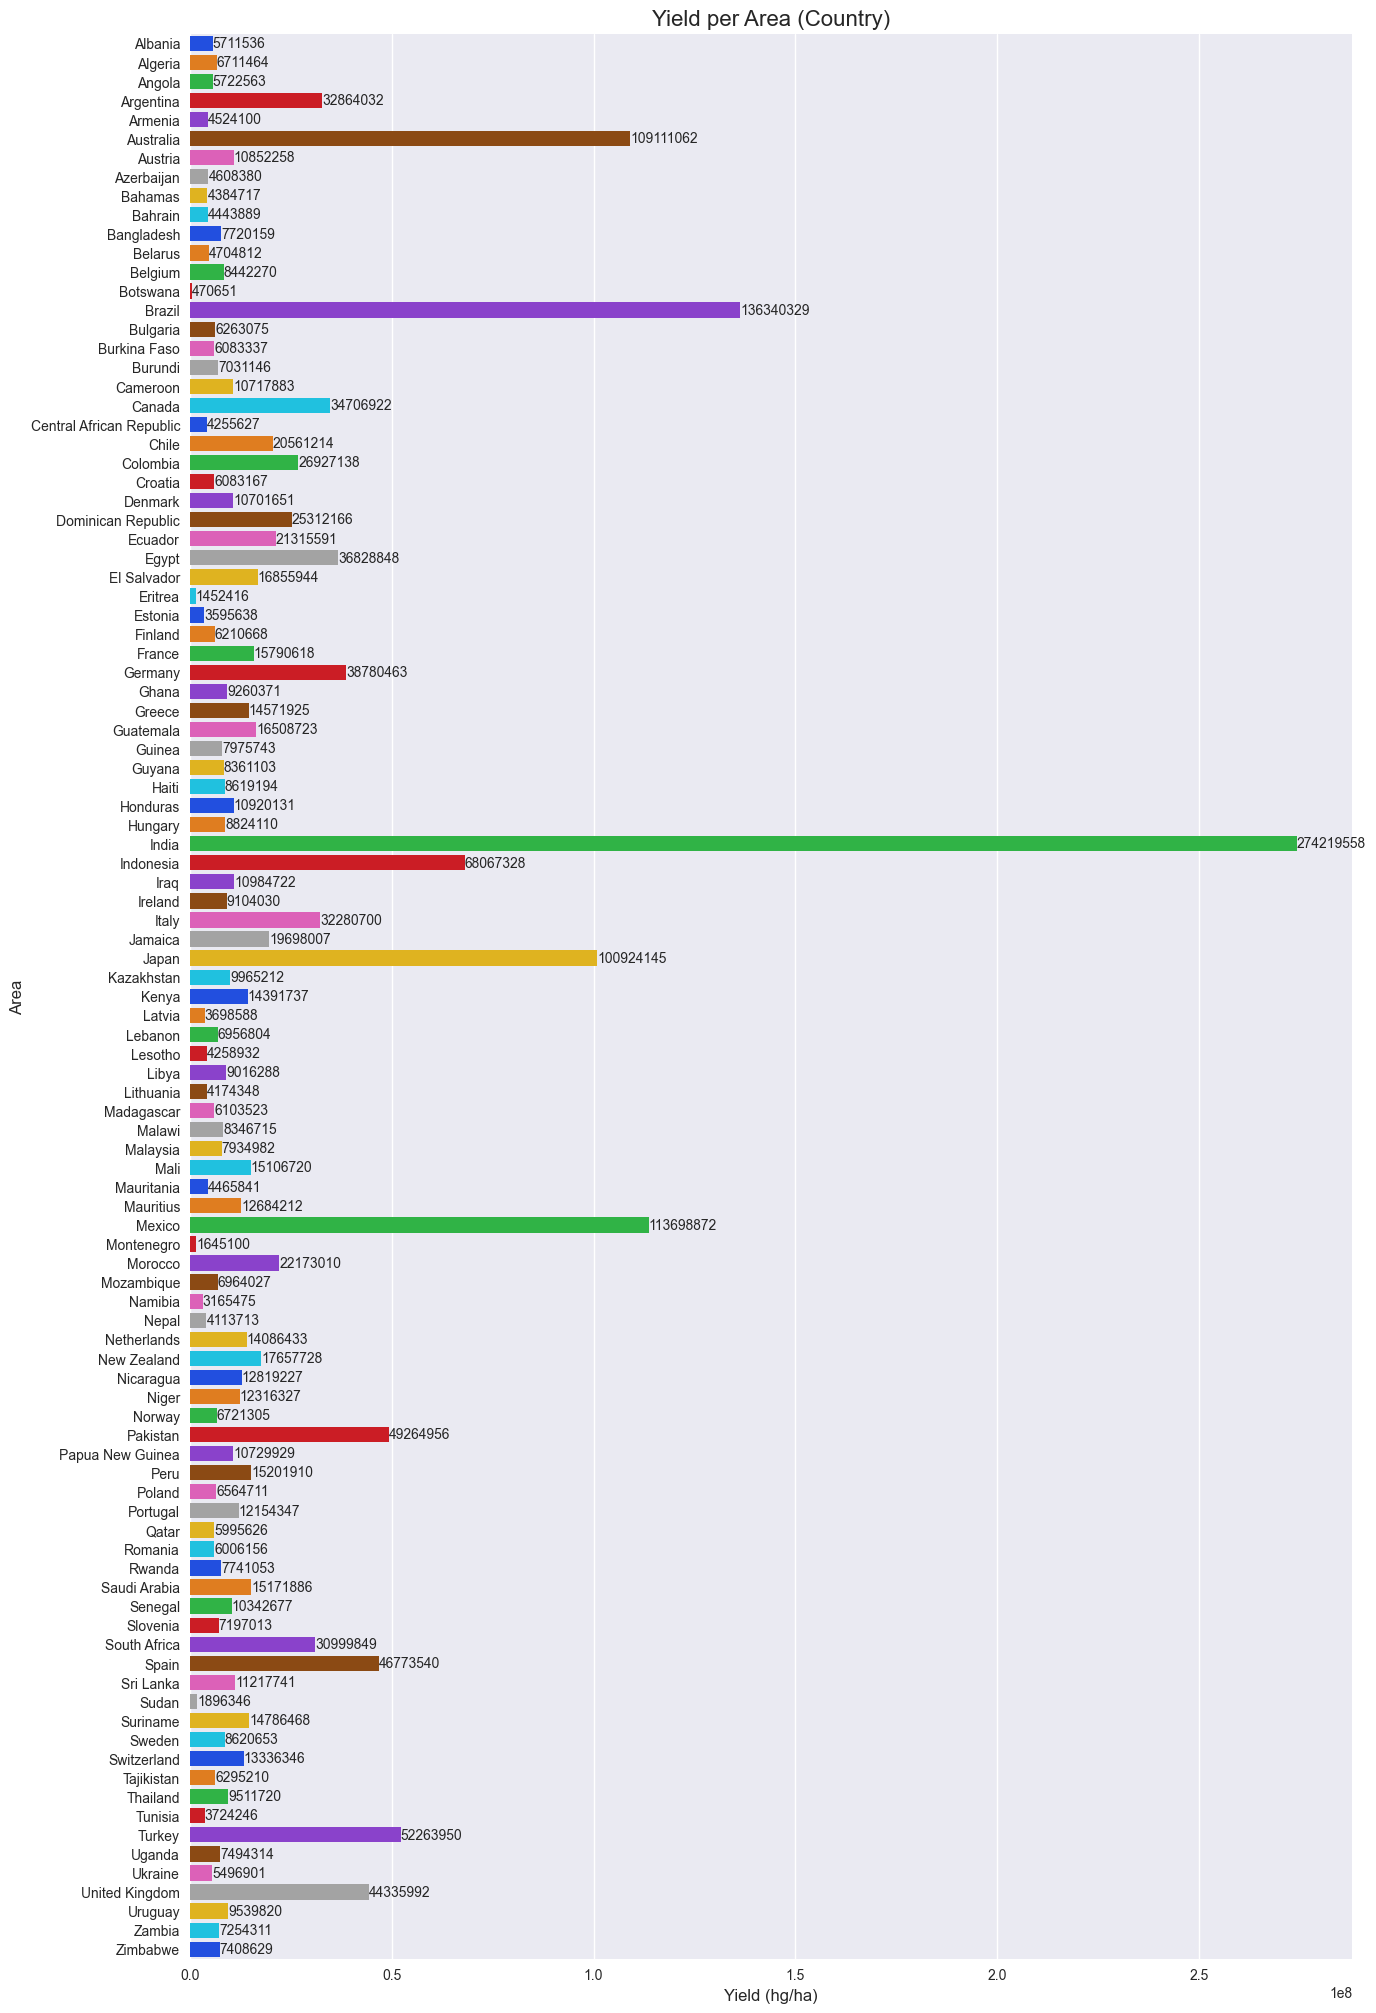

In [18]:
fig = plt.figure(figsize=(15, 25))
plt.style.use("seaborn-v0_8")

y = Yeild_per_Area.index
x = Yeild_per_Area.values.flatten()

# plt.barh(y, x, color='orange')
sns.barplot(y = y, x = x, palette='bright')

for i in range(len(Yeild_per_Area)):
    plt.text(x[i], i, s=str(x[i]), va='center', ha='left')  # Add labels to the right of each bar

plt.title("Yield per Area (Country)", fontsize=16)
plt.xlabel("Yield (hg/ha)", fontsize=12)
plt.ylabel("Area", fontsize=12)

plt.show()


### Frequency Vs Item

<Axes: xlabel='count', ylabel='Item'>

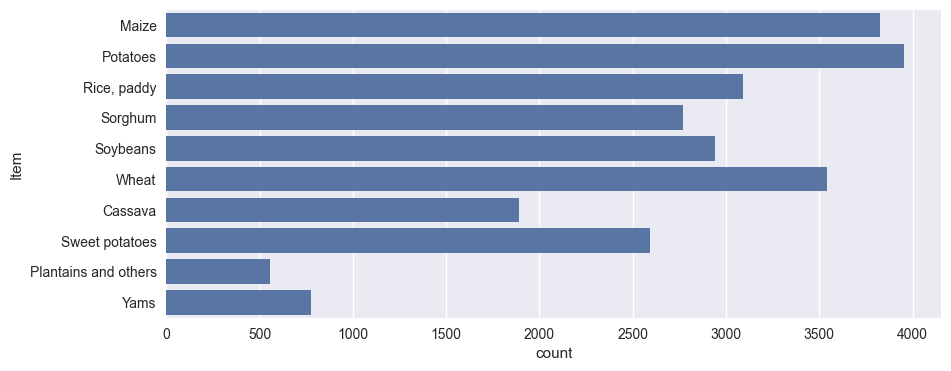

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(df['Item'])

### Yeild per Item

In [20]:
Yeild_per_item = df.groupby(by = ['Item'])['hg/ha_yield'].sum()

C:\Users\mnrth\AppData\Local\Temp\ipykernel_15300\3212578018.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = y, x = x, palette='bright')


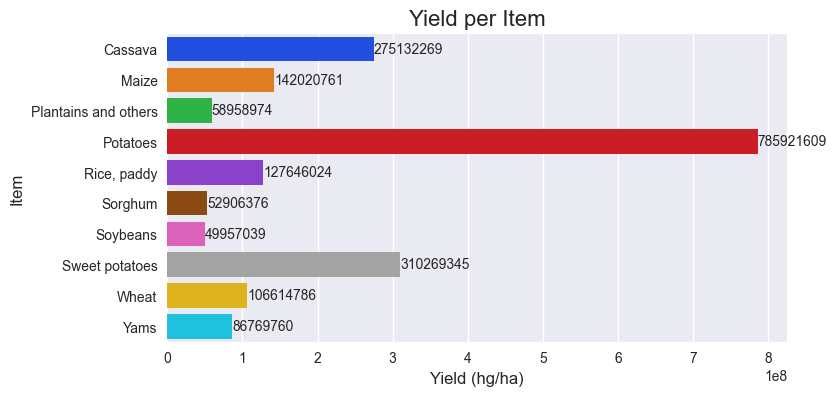

In [21]:
fig = plt.figure(figsize=(8, 4))
plt.style.use("seaborn-v0_8")

y = Yeild_per_item.index
x = Yeild_per_item.values.flatten()

# plt.barh(y, x, color='orange')
sns.barplot(y = y, x = x, palette='bright')

for i in range(len(Yeild_per_item)):
    plt.text(x[i], i, s=str(x[i]), va='center', ha='left')  # Add labels to the right of each bar

plt.title("Yield per Item", fontsize=16)
plt.xlabel("Yield (hg/ha)", fontsize=12)
plt.ylabel("Item", fontsize=12)

plt.show()


### Train test split, Rearranging columns

In [22]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [23]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [27]:
df = df.reindex(columns=['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield'])

In [29]:
df.head(2)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667


In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(f"X_train.shape => {X_train.shape}\nX_test.shape => {X_test.shape}\ny_train.shape => {y_train.shape}\ny_test.shape => {y_test.shape}")

X_train.shape => (20745, 6)
X_test.shape => (5187, 6)
y_train.shape => (20745,)
y_test.shape => (5187,)


In [38]:
X_train

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55
9468,Greece,Sweet potatoes,2012,652.0,8002.20,18.82
6793,Colombia,Maize,2006,3240.0,98328.63,27.51
28212,Zimbabwe,Potatoes,2010,657.0,3305.17,21.17
7358,Dominican Republic,Sweet potatoes,2007,1410.0,5689.80,27.08
...,...,...,...,...,...,...
23678,Portugal,Sweet potatoes,2004,854.0,16942.00,16.31
5960,Canada,Wheat,2006,537.0,36572.75,7.85
860,Australia,Potatoes,1991,534.0,17866.00,18.73
17223,Kazakhstan,Potatoes,1998,250.0,6416.14,6.94


### Converting Categorical to numerical and Scaling the values

<details>
<summary>Click here to expand</summary>

```python
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Sample DataFrame
data = pd.DataFrame({
    'Age': [25, 35, 40],
    'City': ['London', 'Paris', 'Berlin'],
    'Income': [50000, 60000, 45000]
})

# Define the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Income']),  # Scale numerical columns
        ('cat', OneHotEncoder(), ['City'])            # One-hot encode categorical column
    ],
    remainder='passthrough'  # Keep other columns as-is (if any)
)

# Fit and transform the data
transformed_data = preprocessor.fit_transform(data)

# Convert the transformed data to a DataFrame for better visualization
columns = ['Age_scaled', 'Income_scaled', 'City_Berlin', 'City_London', 'City_Paris']
transformed_df = pd.DataFrame(transformed_data, columns=columns)

print(transformed_df)


<details>
    <summary>Click here to see purpose of OneHotEncoder</summary>

```python
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample data
data = pd.DataFrame({'City': ['London', 'Paris', 'Berlin']})

# Apply OneHotEncoder with drop='first'
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(data[['City']]).toarray()

# Get the feature names
feature_names = encoder.get_feature_names_out(['City'])

# Convert to DataFrame for visualization
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
print(encoded_df)


In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder', ohe, [0, 1]),
        ('standardization', scaler, [2, 3, 4, 5])
    ],
    remainder='passthrough'
)

In [43]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 ['Area', 'Item']),
                                ('standardization', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp'])])

In [56]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [57]:
X_test_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30727 stored elements and shape (5187, 113)>

### Training Model

In [58]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
model = {
    'lr': LinearRegression(),
    'lss': Lasso(), 
    'rg': Ridge(),
    'knr': KNeighborsRegressor(), 
    'dtr': DecisionTreeRegressor()
}

In [60]:
for name, mod in model.items():
    mod.fit(X_train_dummy, y_train)
    y_pred = mod.predict(X_test_dummy)

    print(f"{name} -> MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

lr -> MSE: 1821709514.9271312, Score: 0.7486566085945691


C:\Users\mnrth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.44922, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss -> MSE: 1822234158.2996287, Score: 0.7485842229351424
rg -> MSE: 1822540097.745202, Score: 0.7485420121121846
knr -> MSE: 128210171.76440331, Score: 0.9823106927202787
dtr -> MSE: 171135181.51879698, Score: 0.9763882789438914


### Model Selection

In [61]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
dtr.predict(X_test_dummy)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 132600.],
      shape=(5187,))

### Predictive System

In [62]:
def prediction(Area, Item, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp):
    features = np.array([[Area, Item, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp]])

    transformed_features = preprocessor.transform(features)
    predicted_val = dtr.predict(transformed_features)
    
    return predicted_val

In [64]:
Area = 'Saudi Arabia'
Item = 'Sorghum'
Year = 2000
average_rain_fall_mm_per_year = 59.0
pesticides_tonnes = 3024.11
avg_temp = 26.55

result = prediction(Area, Item, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp)

C:\Users\mnrth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\mnrth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
result

array([13384.])

### Pickle flles

In [67]:
import pickle
pickle.dump(dtr, open('dtr.pkl', 'wb'))
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))